### implementing simple chatbot using langgraph


In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers

from typing import Annotated
from langgraph.graph import add_messages ## add_messages--> reducer

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages] ## annotated---> adding messages i.e conversation, to messages variable
    

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192")
llm.invoke("hello")

AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.074285714, 'prompt_time': 0.000137738, 'queue_time': 0.056960422000000004, 'total_time': 0.074423452}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--7605a027-84d8-4059-b6c0-51bfe6ac6ee2-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})

### WE will start creating nodes

In [5]:
def super_bot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

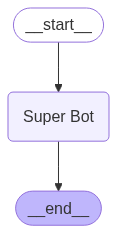

In [7]:
graph=StateGraph(State)

graph.add_node("Super Bot",super_bot)

graph.add_edge(START,"Super Bot")

graph.add_edge("Super Bot",END)

graph_builder=graph.compile()

from IPython.display import Image, display

display(Image(graph_builder.get_graph().draw_mermaid_png()))

## Invocation

In [9]:
graph_builder.invoke({"messages":"Hi my name is lokesh and i like playing cricket"})

{'messages': [HumanMessage(content='Hi my name is lokesh and i like playing cricket', additional_kwargs={}, response_metadata={}, id='91a164df-6b77-4763-badf-9a7daab42e7f'),
  AIMessage(content="Hi Lokesh! Nice to meet you! Cricket is an amazing sport, and I'm sure you must be thrilled to play it. Do you have a favorite team or player in the Indian cricket team? Or do you play cricket with your friends or in a local league?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 21, 'total_tokens': 77, 'completion_time': 0.215236336, 'prompt_time': 0.000384934, 'queue_time': 0.054600336, 'total_time': 0.21562127}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--f30c9977-8d4e-4785-8b8d-84b964b2a064-0', usage_metadata={'input_tokens': 21, 'output_tokens': 56, 'total_tokens': 77})]}